In [1]:
pip install clustimage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.7 MB/s 
     |████████████████████████████████| 296 kB 48.3 MB/s 
     |████████████████████████████████| 1.1 MB 36.4 MB/s 
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=1ff9c3612656d3372faae33d93cf23e0ed28e832afa59e5c19e5ade6eedcc80c
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=5ec0d33d232f928dbebbd371bf60beee826f8e1cbeb0ebc1d34190af22cc9289
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=a8d1f231cb12d0b7b9e14206eb8c4435d00d30456fe32472f80c892dd10c573a
  Stored in directory: /root/.cache/pip/whee

In [2]:
from clustimage import Clustimage
import matplotlib.pyplot as plt


In [3]:
cl = Clustimage(method='pca',
                embedding='tsne',
                grayscale=False,
                dim=(128,128),
                params_pca={'n_components':0.95})

In [29]:
X = cl.import_example(data='mnist')

In [5]:
print(X.shape)

(1797, 64)


In [6]:
results = cl.fit_transform(X,
                           cluster='agglomerative',
                           evaluate='silhouette',
                           metric='euclidean',
                           linkage='ward',
                           min_clust=3,
                           max_clust=25,
                           cluster_space='high')

[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Scaling images..
[clustimage] >INFO> Writing images to tempdir [/tmp/clustimage]
100%|██████████| 1797/1797 [00:00<00:00, 7222.43it/s]
[clustimage] >INFO> Extracting features using method: [pca]
[clustimage] >INFO> Extracted features using [pca]: samples=1797, features=29
[clustimage] >INFO> Compute [tsne] embedding


[pca] >Column labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [64] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [29] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [64] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.


[clustimage] >INFO> Cluster evaluation using the [high] feature space of the [pca] features.



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 22/22 [00:01<00:00, 11.75it/s]
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (1797, 29) feature-space.


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [10].
[clusteval] >Fin.


In [7]:
print(results)

{'img': array([[  0,   0,  85, ...,   0,   0,   0],
       [  0,   0,   0, ..., 159,   0,   0],
       [  0,   0,   0, ..., 255, 143,   0],
       ...,
       [  0,   0,  15, ...,  95,   0,   0],
       [  0,   0,  31, ..., 191,   0,   0],
       [  0,   0, 159, ..., 191,  15,   0]], dtype=uint8), 'feat': array([[ -23.99825563,  361.6676699 , -156.23555787, ...,   62.84207476,
         -18.29628521,  -18.65344517],
       [ 129.01046857, -332.19361869,   69.70334053, ...,   34.92800549,
          -6.83064075,   37.70869564],
       [ 112.68904726, -158.58007764,   45.77924866, ...,   67.47084079,
          35.20716581,   11.8494543 ],
       ...,
       [ 173.17792868, -109.24045821,   88.45892933, ...,  -56.26360617,
          30.97942713,   55.94808083],
       [ -79.27380795,  198.65635584, -161.0432422 , ...,   50.90138747,
          15.1347142 ,  -15.60687354],
       [  -6.24252969,  101.23191554,  172.1157331 , ...,  -48.59774175,
          21.86927021,   40.25778896]]), 'xycoor

In [8]:
# init with PCA method and all default parameters
cl = Clustimage(method='pca')


[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]


In [9]:
# Load MNIST example data
Xraw = cl.import_example(data='mnist')

# Import data. This can either by a list with pathnames or NxM array.
X = cl.import_data(Xraw)
# Extract features with the initialized method (PCA in this case)
Xfeat = cl.extract_feat(X)
# Embedding using tSNE
xycoord = cl.embedding(Xfeat)

# Cluster with all default settings
labels = cl.cluster(cluster='agglomerative',
                    evaluate='silhouette',
                    metric='euclidean',
                    linkage='ward',
                    min_clust=3,
                    max_clust=25,
                    cluster_space='high')

# Return
results = cl.results

[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Scaling images..
[clustimage] >INFO> Writing images to tempdir [/tmp/clustimage]
100%|██████████| 1797/1797 [00:00<00:00, 7829.84it/s]
[clustimage] >INFO> Extracting features using method: [pca]
[clustimage] >INFO> Extracted features using [pca]: samples=1797, features=29
[clustimage] >INFO> Compute [tsne] embedding


[pca] >Column labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [64] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [29] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [64] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.


[clustimage] >INFO> Cluster evaluation using the [high] feature space of the [pca] features.



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 22/22 [00:01<00:00, 11.90it/s]
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (1797, 29) feature-space.


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [10].
[clusteval] >Fin.


In [10]:
cl.results.keys()

dict_keys(['img', 'feat', 'xycoord', 'pathnames', 'labels', 'url', 'filenames'])

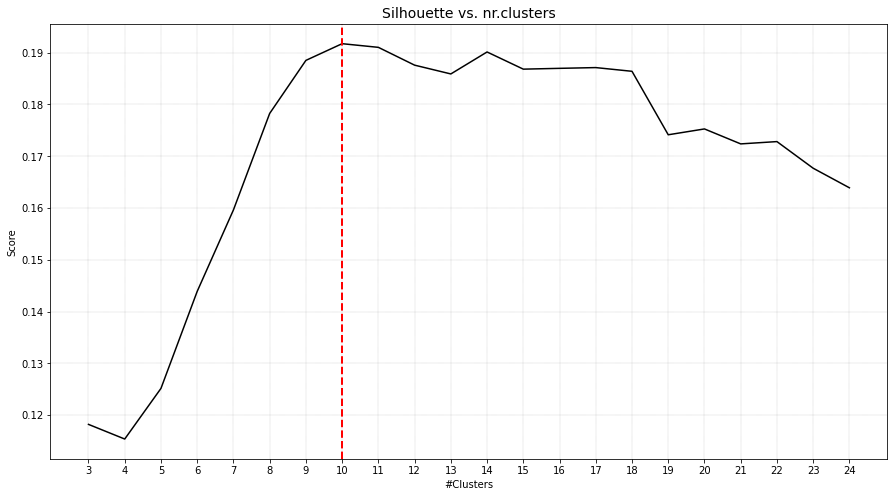

[clusteval] >Estimated number of n_clusters: 10, average silhouette_score=0.576


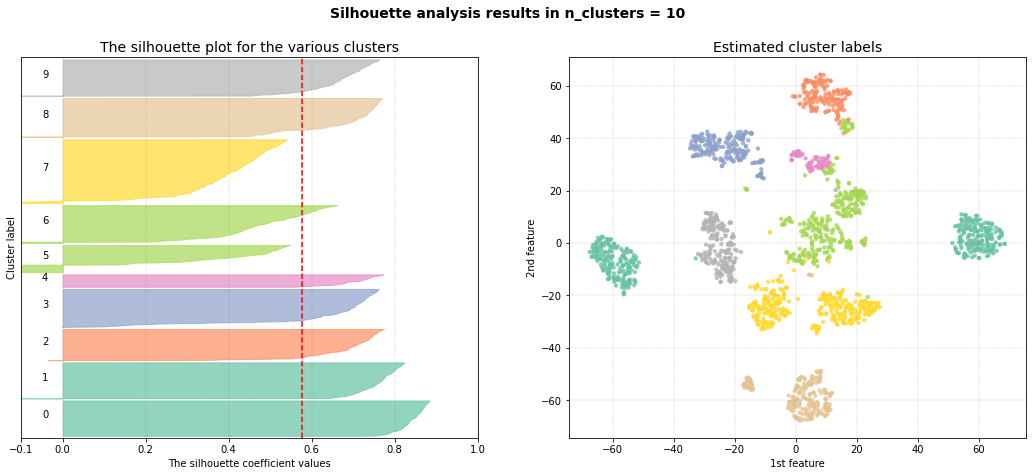

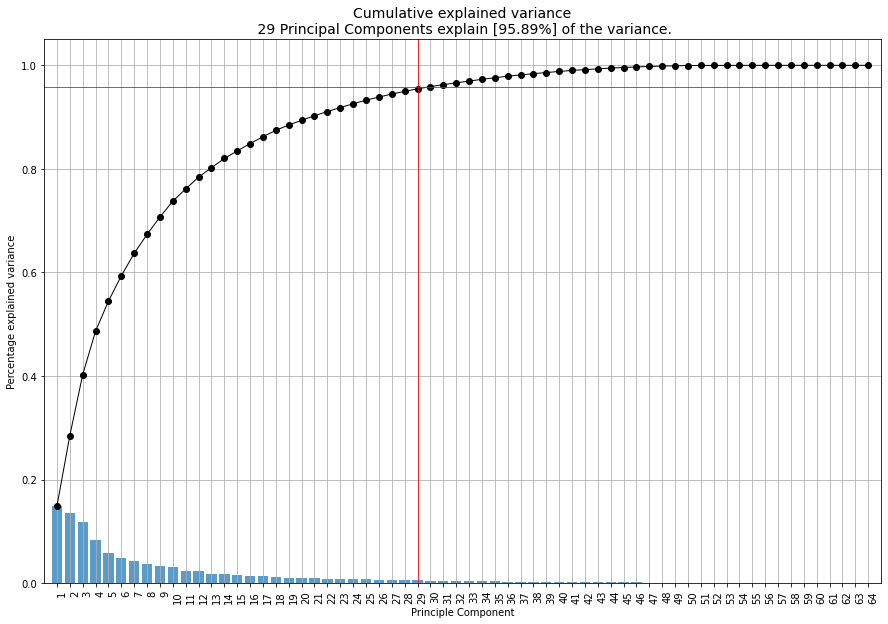

[clusteval] >Plotting the dendrogram with optimized settings: metric=euclidean, linkage=ward, max_d=4445.929. Be patient now..
[clusteval] >Compute cluster labels.


<Figure size 432x288 with 0 Axes>

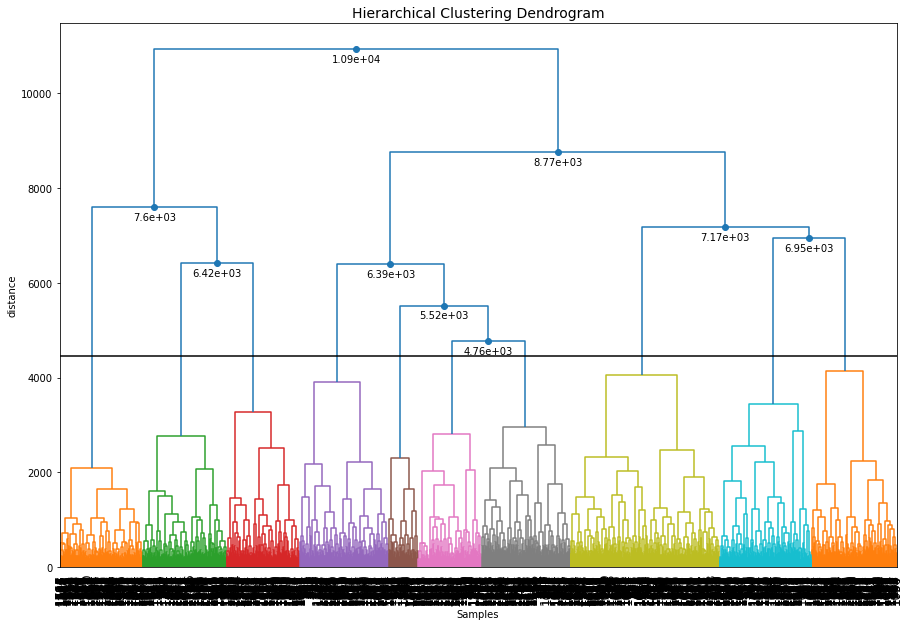

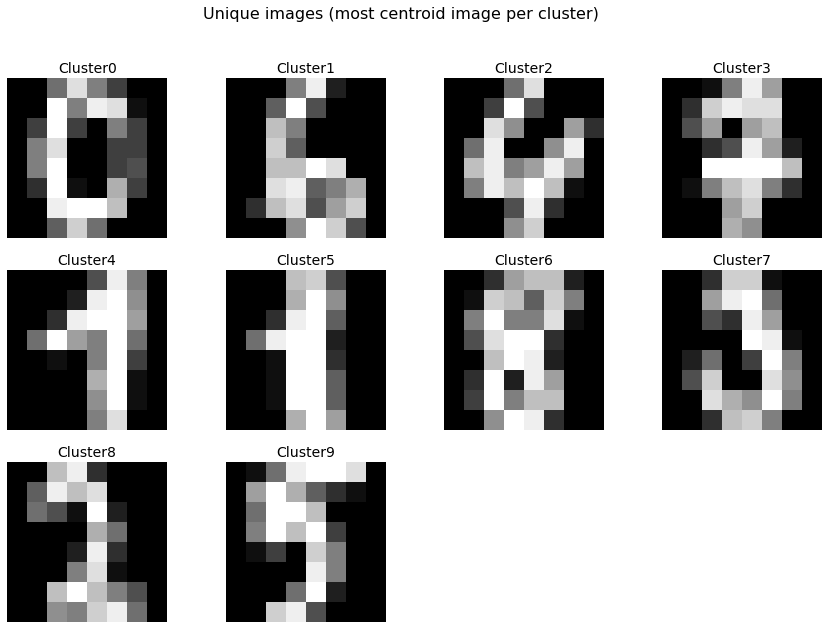

[colourmap]> Warning: Colormap [Set1] can not create [10] unique colors! Available unique colors: [8].
[colourmap]> Warning: Colormap [Set1] can not create [10] unique colors! Available unique colors: [8].


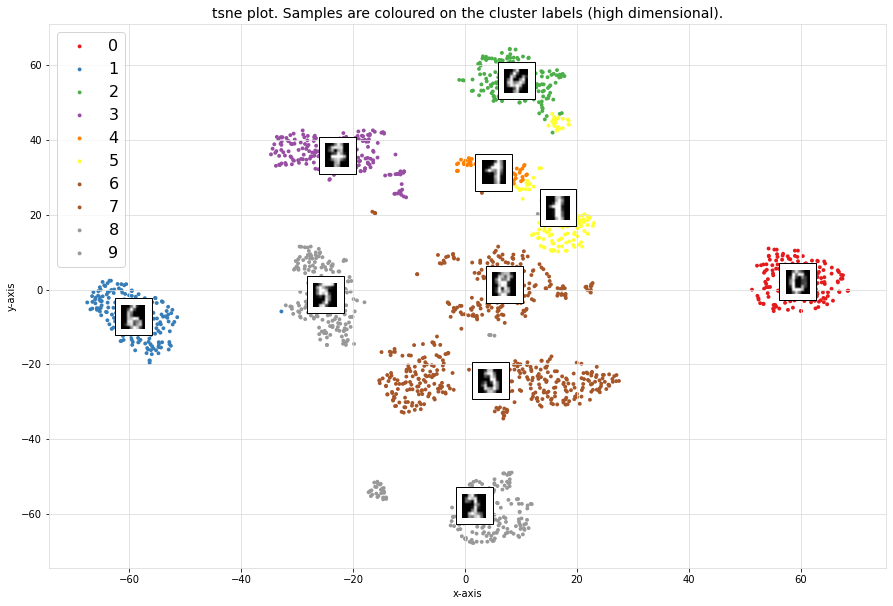

[colourmap]> Warning: Colormap [Set1] can not create [10] unique colors! Available unique colors: [8].
[colourmap]> Warning: Colormap [Set1] can not create [10] unique colors! Available unique colors: [8].


<Figure size 432x288 with 0 Axes>

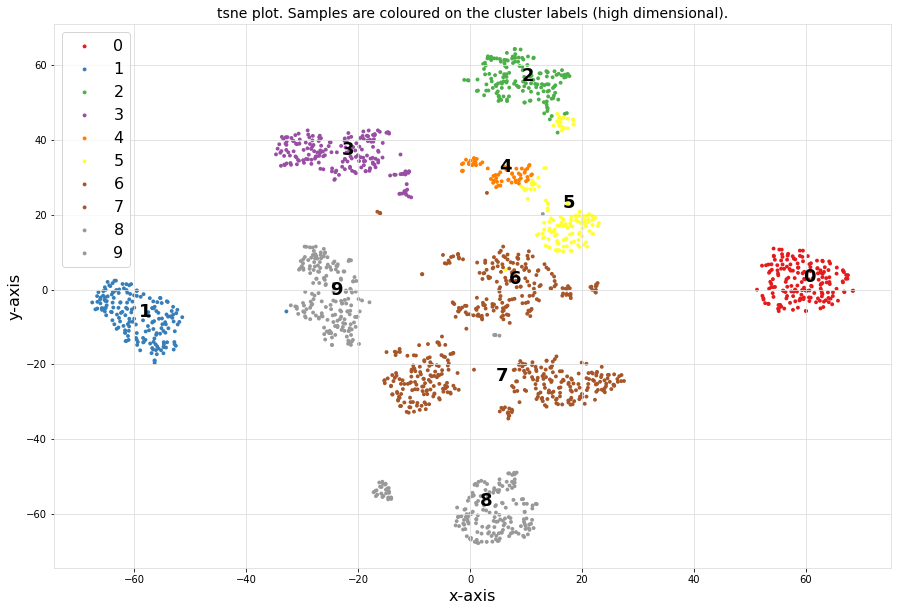

<Figure size 432x288 with 0 Axes>

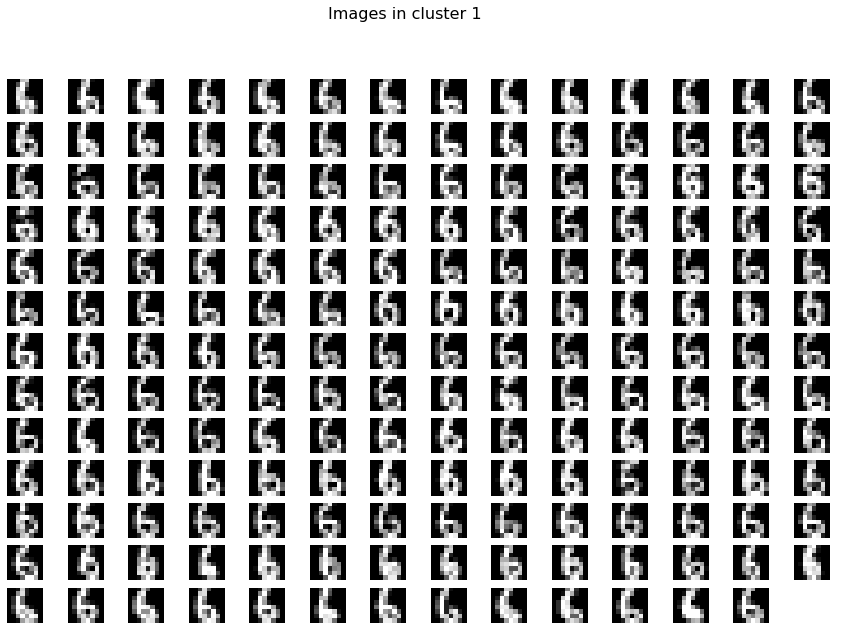

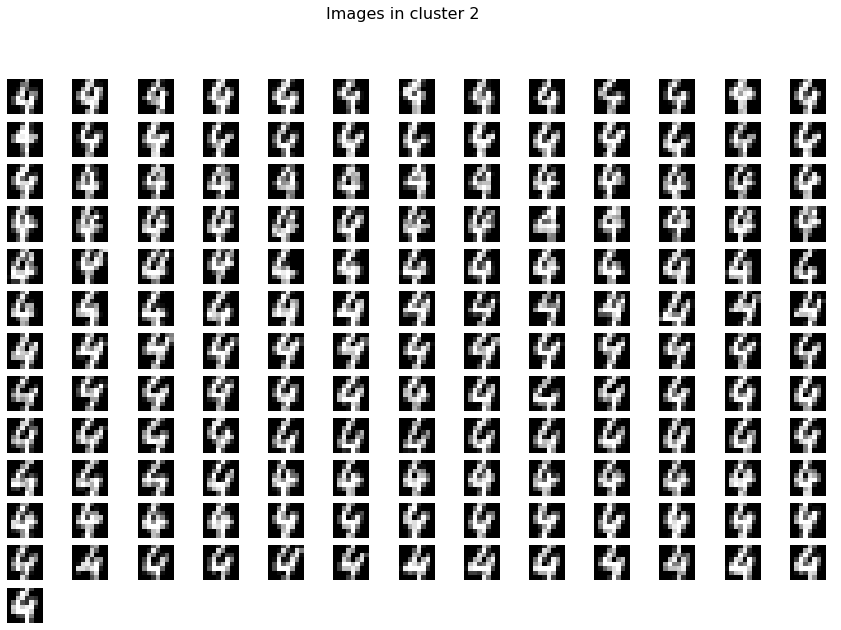

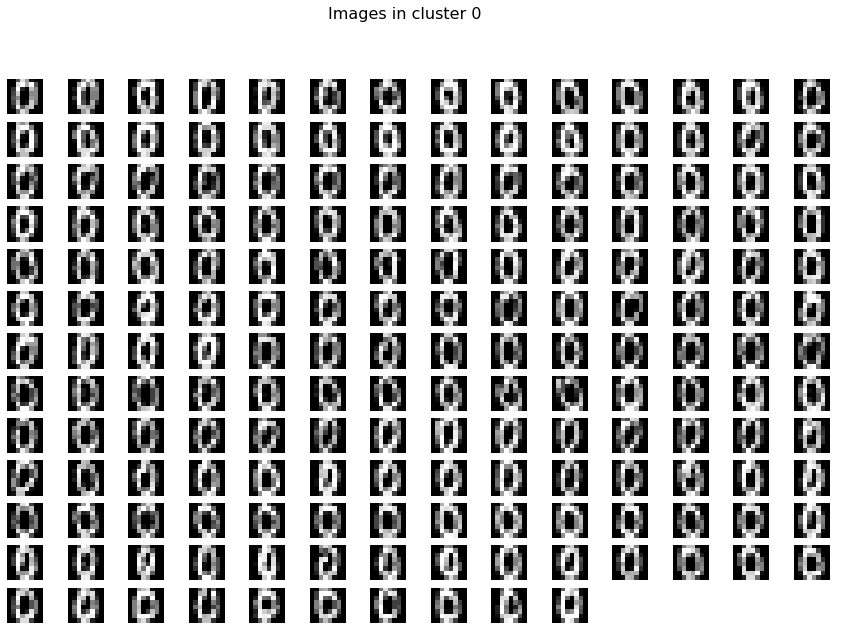

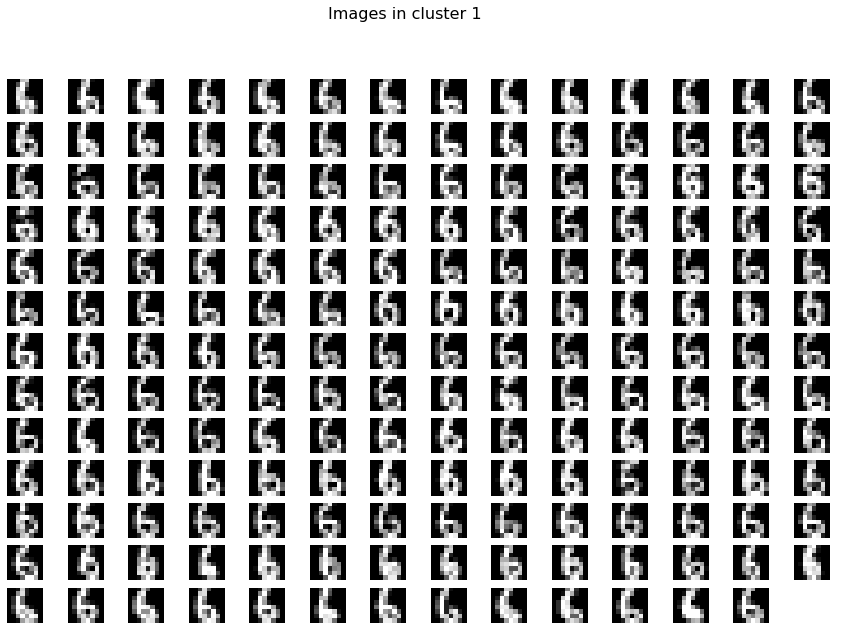

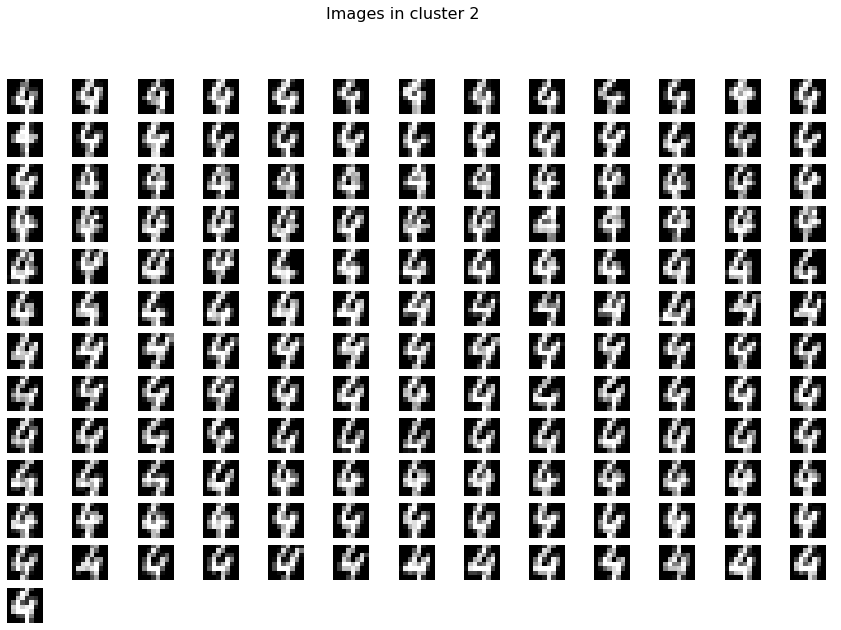

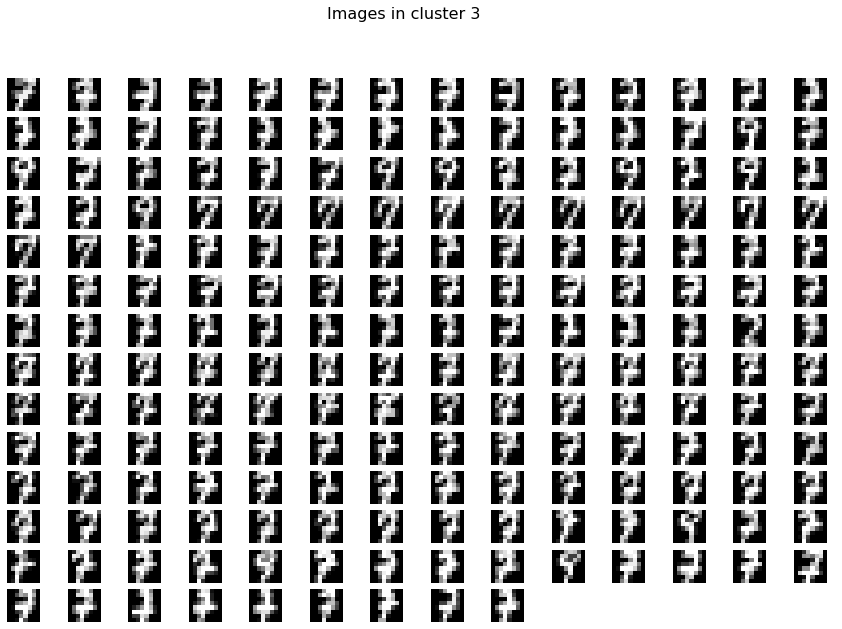

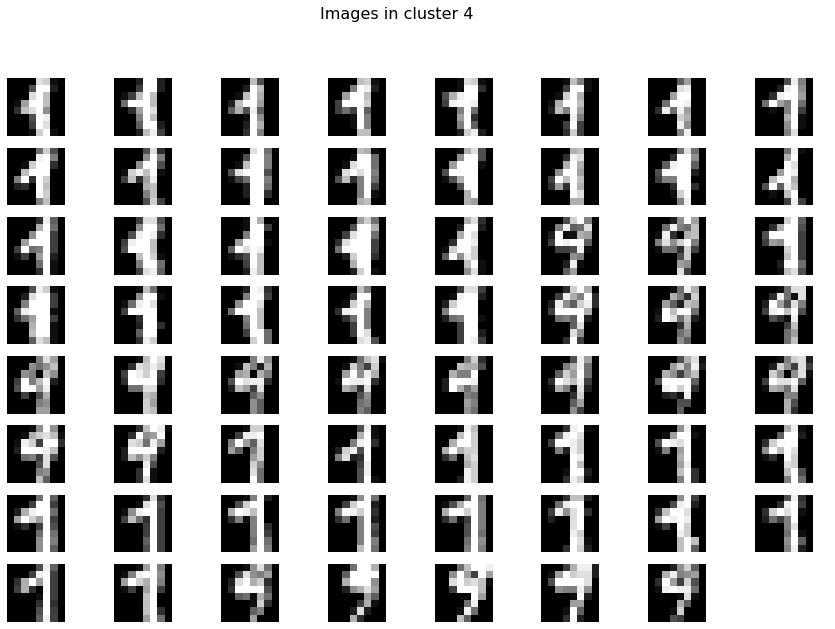

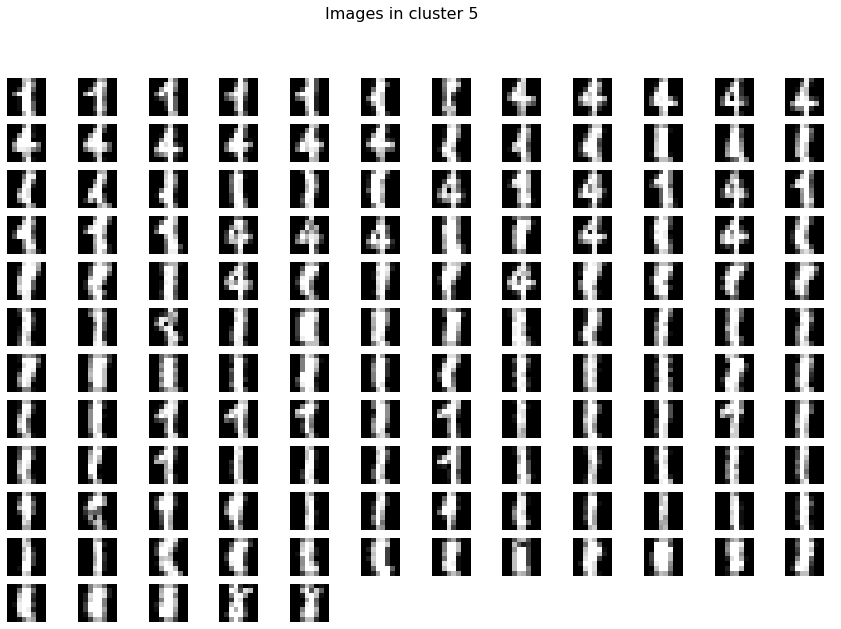

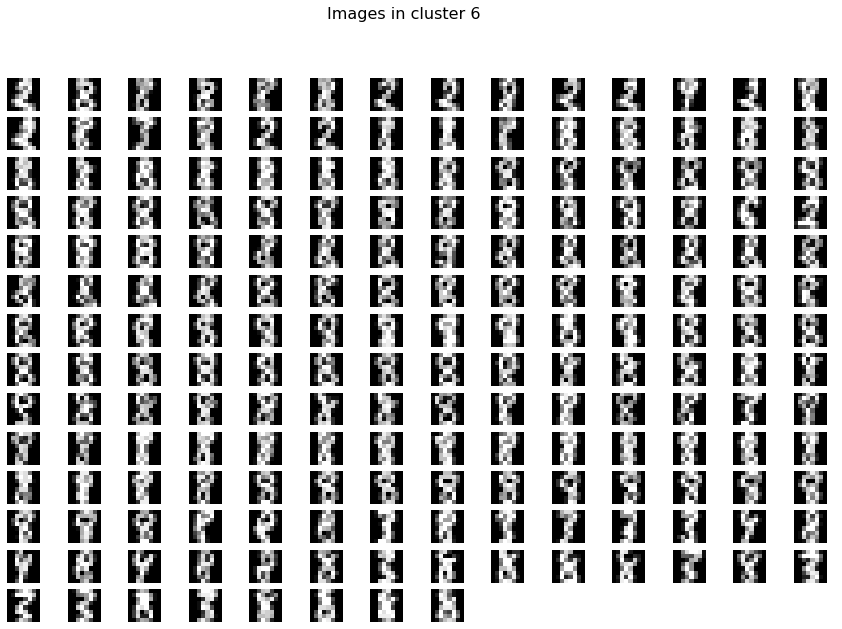

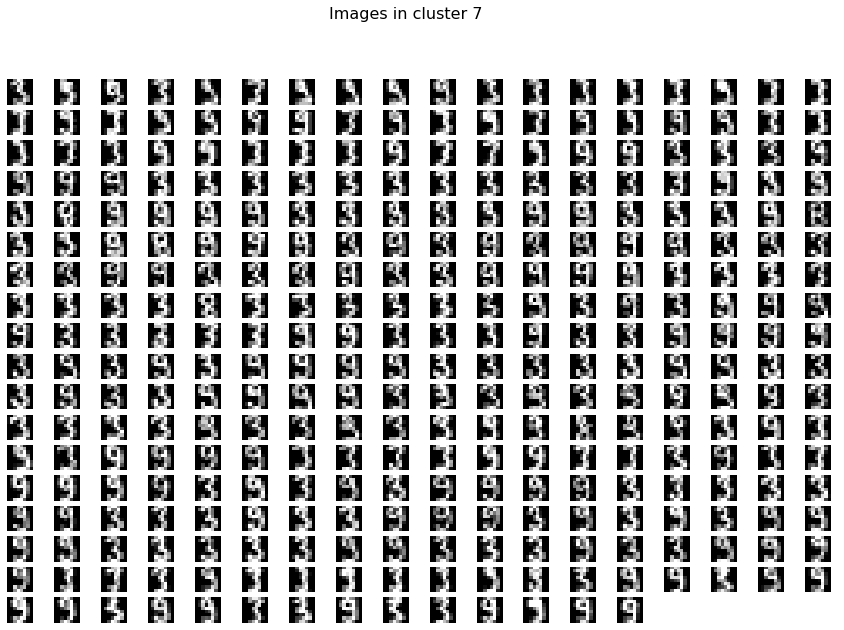

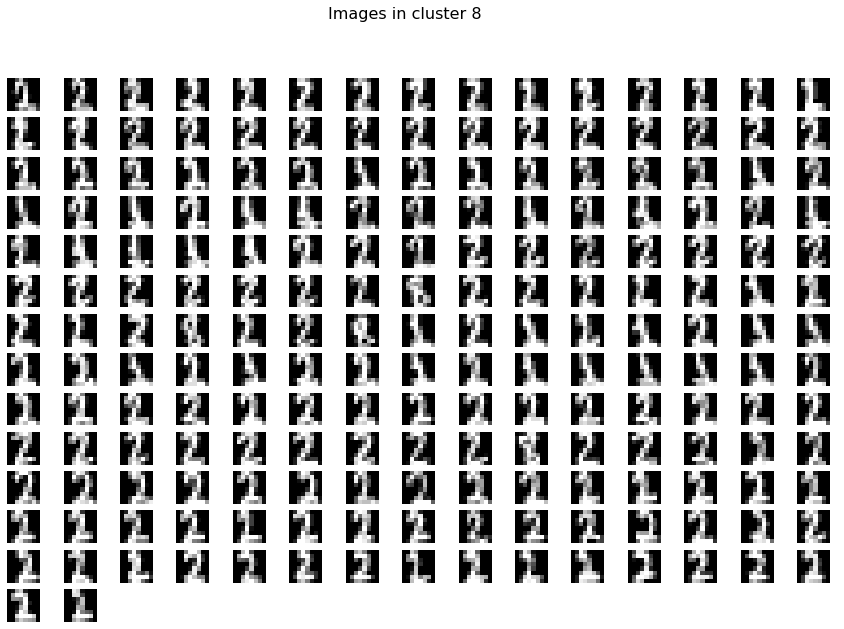

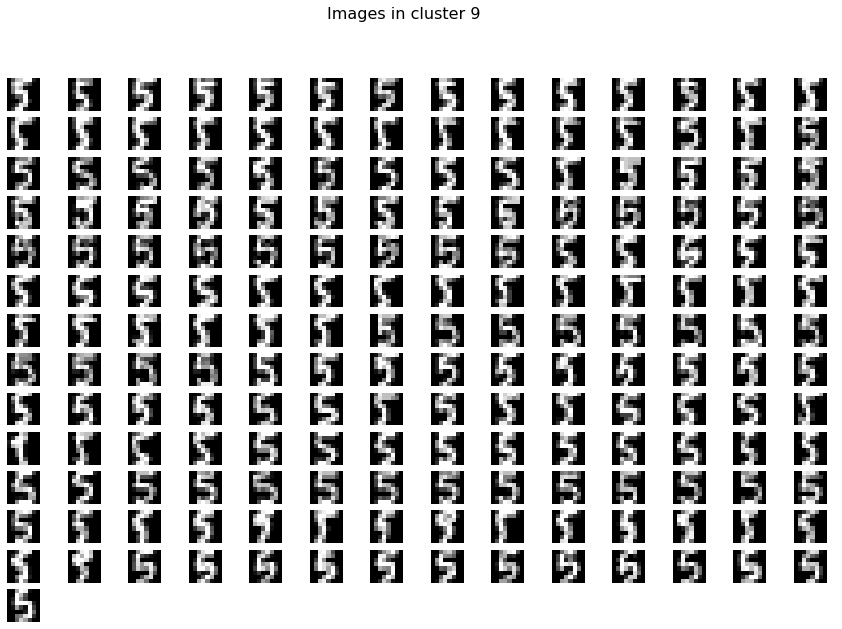

In [11]:
# Silhouette plots
cl.clusteval.plot()
cl.clusteval.scatter(cl.results['xycoord'])

# PCA explained variance plot
cl.pca.plot()

# Dendrogram
cl.dendrogram()

# Plot unique image per cluster
cl.plot_unique(img_mean=False)

# Scatterplot
cl.scatter(zoom=3, img_mean=False)
cl.scatter(zoom=None, img_mean=False)

# Plot images per cluster or all clusters
cl.plot(cmap='binary', labels=[1,2])
cl.plot(cmap='binary')